<a href="https://colab.research.google.com/github/jhj030722/til/blob/main/%EB%94%A5%EB%9F%AC%EB%8B%9D_week8_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

tf.keras.utils.set_random_seed(42)

- 일반적으로 기본 순환층은 긴 시퀀스를 학습하기 어려움
  - 시퀀스가 길수록 순환되는 은닉상태에 담긴 정보가 희석되기 때문
  - 멀리 떨어져 있는 단어 정보를 인식하는 데 어려울 수 있다
- 이를 위해 LSTM 과 GRU 셀이 발명되었다.

<핵심 포인트>
- LSTM 셀은 타임스텝이 긴 데이터를 효과적으로 학습하기 위해 고안된 순환층이다. 입력/삭제/출력 게이트를 하는 작은 셀이 포함되어 있다.
- GRU 셀은 LSTM 셀의 간소화 버전으로 생각할 수 있지만 못지 않는 성능을 냄

## LSTM 구조

- 기본 개념: 입력과 가중치를 곱하고 절편을 더해 활성화 함수를 통과시키는 구조 여러 개
- 이때 기본 순환층과는 달리 **시그모이드 활성화 함수**를 사용함
- 또 tanh 활성화 함수를 통과한 어떤 값과 곱해져서 은닉 상태를 만듬

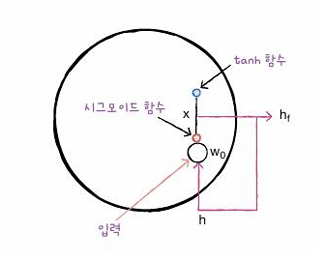

- 은닉 상태를 계산할 때 사용하는 가중치 Wx와 Wh를 통틀어 Wo 라고 표시
- 파란색 원은 tanh 함수를 나타냄
- 주황색 원은 시그모이드 함수를 나타냄
- x는 곱셈을 나타냄
- **그럼 tanh 함수를 통과하는 값은 무엇일까?**

---
- LSTM에는 순환되는 상태가 2개 있음 : 은닉 상태, **셀 상태**

  - 은닉 상태와 달리 셀 상태는 다음 층으로 전달되지 X, LSTM 셀 안에서만 순환되는 값

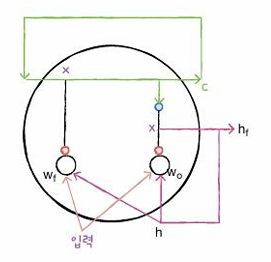

- 셀 상태를 은닉 상태(h)와 구분하여 c로 표기

< 셀 상태를 계산하는 과정 >
- 입력과 은닉 상태를 또 다른 가중치 Wf에 곱한 다음 ▶ 시그모이드 함수 통과시킴 ▶ 이전 타임스텝의 셀 상태와 곱합 ▶ 새로운 셀 상태 생성 ▶ 이 셀 상태가 오른쪽에서 tanh 함수를 통과 ▶ 새로운 은닉 상태 생성에 기여

- **입력과 은닉 상태에 곱해지는 가중치 Wo과 Wf가 다르다는 것**이 중요
  - 이 두 개의 작은 셀은 각기 다른 기능을 위해 훈련됨
  - 여기에 2개의 작은 셀이 더 추가되어 셀 상태를 만드는 데에 기여함 (즉, LSTM에는 총 4개의 셀이 있다)


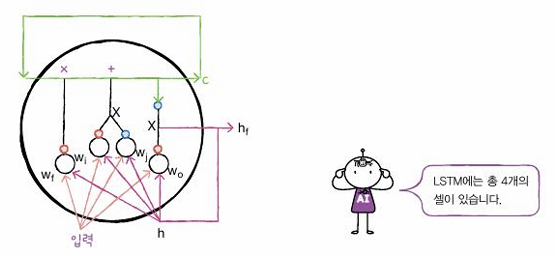

- 이전과 마찬가지로 입력과 은닉 상태를 각기 다른 가중치에 곱한 다음
- 하나는 시그모이드 함수를 통해 통과시키고
- 다른 하나는 tanh 함수를 통과시킵니다.
- 그다음 두 결과를 곱한 후 이전 셀 상태와 더 합니다.

 ▶ 이 결과가 최종적인 다음 셀 상태가 됨
 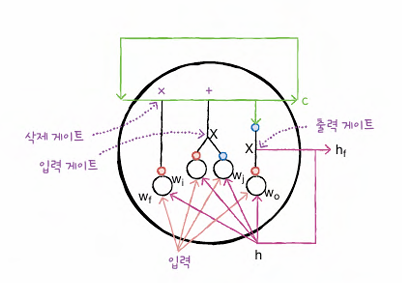

## LSTM 신경망 훈련하기

이전 처럼 IMDB 리뷰 데이터를 로드하고 훈련 세트와 검증 세트로 나눈다.

In [2]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = imdb.load_data(
    num_words=500)

train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# pad_Sequence()함수로 각 샘플의 길이를 100에 맞추기
# 부족한 것에는 패딩 추가

from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [4]:
from tensorflow import keras

# LSTM 셀을 사용한 순환층 만들기
# SimpleRNN 클래스를 LSTM 클래스로 바꾸기만 하면 됨
model = keras.Sequential()

model.add(keras.layers.Embedding(500, 16, input_shape=(100,)))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 16)        │         8,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 8)              │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,809 (34.41 KB)

 Trainable params: 8,809 (34.41 KB)

 Non-trainable params: 0 (0.00 B)

2절에서 임베딩을 사용했던 순환 신경망 모델과 완전히 동일함

- 심플RNN 클래스의 모델 파라미터 개수는 200개였음 -> LSTM 셀에는 작은 셀이 4개 있으므로 정확히 4배가 늘어 모델 파라미터 개수가 800개 됨

In [5]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy',
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.keras',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.5110 - loss: 0.6929 - val_accuracy: 0.5864 - val_loss: 0.6911
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5784 - loss: 0.6907 - val_accuracy: 0.6258 - val_loss: 0.6874
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6217 - loss: 0.6858 - val_accuracy: 0.6562 - val_loss: 0.6765
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6681 - loss: 0.6682 - val_accuracy: 0.7096 - val_loss: 0.6177
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7180 - loss: 0.6006 - val_accuracy: 0.7248 - val_loss: 0.5760
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7282 - loss: 0.5690 - val_accuracy: 0.7404 - val_loss: 0.5555
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7481 - loss: 0.5465 - val_accuracy: 0.7450 - val_loss: 0.5383
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7600 - loss: 0.5274 - val_a

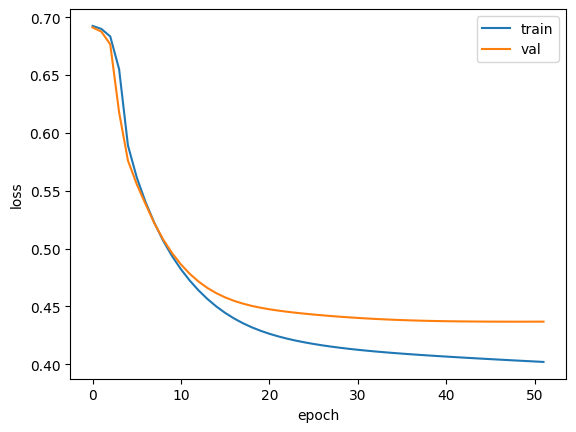

In [6]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

기본 순환층보다 LSTM이 과대적합을 억제하면서 훈련을 잘 수행한 것으로 보임.
하지만 경우에 따라서는 **과대적합을 더 강하게 제어할 필요** 있음
-> 드롭아웃을 적용해볼까?

## 순환 층에 드롭아웃 적용하기

- 완전 연결 신경마와 합성곱 신경망에서는 *드롭아웃* 클래스를 사용해 드롭아웃을 적용했음 => 이를 통해 모델이 훈련 세트에 너무 과대적합 되는 것을 막음
  - 드롭아웃이란: 은닉층에 있는 뉴런의 출력을 랜덤하게 꺼서 과대출력을 막는 기법
- 순환층은 자체적으로 드롭아웃 기능을 제공함
  - SimpleRNN과 LSTM 모두 dropout 매개변수, recurrent_dropout 매개변수를 가지고 있음
    - dropout 매개변수; 셀의 입력에 드롭아웃 적용
    - recurrent_dropout 매개변수: 순환되는 은닉 상태에 드롭아웃 적용
      - 하지만 recurrent_dropout을 사용하면 **GPU를 사용하여 모델 훈련 불가**

In [7]:
model2 = keras.Sequential()

# LSTM 클래스에 dropout 매개변수를 0.3으로 지정해 30% 입력 드롭아웃
model2.add(keras.layers.Embedding(500, 16, input_shape=(100,)))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [8]:
# 모델 훈련
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy',
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.keras',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.5145 - loss: 0.6930 - val_accuracy: 0.5546 - val_loss: 0.6923
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5619 - loss: 0.6920 - val_accuracy: 0.5872 - val_loss: 0.6909
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6026 - loss: 0.6902 - val_accuracy: 0.6164 - val_loss: 0.6879
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6257 - loss: 0.6865 - val_accuracy: 0.6406 - val_loss: 0.6809
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6458 - loss: 0.6773 - val_accuracy: 0.6486 - val_loss: 0.6513
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.6848 - loss: 0.6394 - val_accuracy: 0.7208 - val_loss: 0.6041
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7198 - loss: 0.5997 - val_accuracy: 0.7310 - val_loss: 0.5860
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.7326 - loss: 0.5804 - val_a

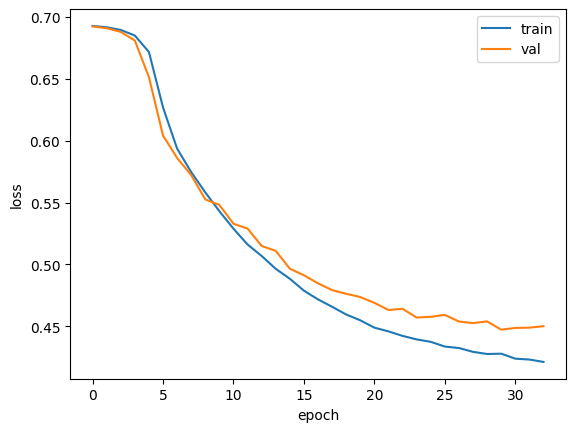

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

훈련 손실과 검증 손실 간의 차이가 좁혀진 것을 확인 가능
- 드롭아웃 효과 발휘한 듯!

## 2개의 층을 연결하기

[ 순환층을 연결할 때의 주의점 ]

- 순환층의 은닉상태는 샘플의 마지막 타임스텝에 대한 은닉 상태만 다음 층으로 전달함
  - but 순환층을 쌓게 되면 all 순환층에 순차 데이터가 필요
  - 따라서 앞쪽의 순환층이 모든 타임스텝에 대한 은닉상태를 출력해야 함
  - 오직 마지막 순혼층만 마지막 타임스텝의 은닉 상태를 출력해야 함.

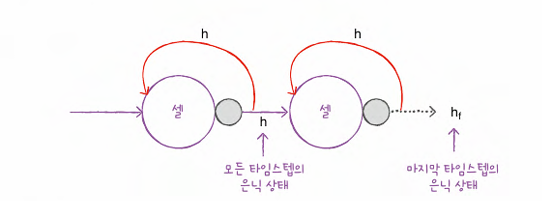

keras의 순환층에서 모든 타임스텝의 은닉 상태를 출력하려면?
- 마지막을 제외한 다른 all 순환층에서 `return_sequence` 매개변수를 `true`로 지정

In [10]:
model3 = keras.Sequential()

model3.add(keras.layers.Embedding(500, 16, input_shape=(100,)))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

model3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 100, 16)        │         8,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 8)         │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 8)              │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,353 (36.54 KB)

 Trainable params: 9,353 (36.54 KB)

 Non-trainable params: 0 (0.00 B)

- 첫번째 LSTM 층이 모든 타임스텝(!00개)의 은닉 상태를 출력하므로 출력 크기가 (none, 100, 8)

- 두번째 LSTM 층의 출력크기는 마지막 타임스텝의 은닉 상태만 출력하기 때문에 (None, 8)임

In [11]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy',
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.keras',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model3.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.5235 - loss: 0.6927 - val_accuracy: 0.5738 - val_loss: 0.6904
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.5854 - loss: 0.6888 - val_accuracy: 0.6384 - val_loss: 0.6765
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.6495 - loss: 0.6604 - val_accuracy: 0.6932 - val_loss: 0.5969
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.7134 - loss: 0.5717 - val_accuracy: 0.7300 - val_loss: 0.5459
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.7405 - loss: 0.5346 - val_accuracy: 0.7478 - val_loss: 0.5202
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.7571 - loss: 0.5090 - val_accuracy: 0.7558 - val_loss: 0.5120
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.7712 - loss: 0.4930 - val_accuracy: 0.7612 - val_loss: 0.5026
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.7732 - loss: 0.4813 - 

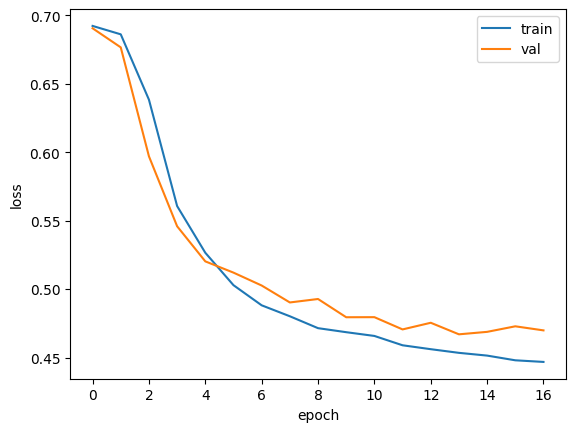

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## GRU 신경망 훈련하기

- GRU란 Gated Recurrent Unit의 약자
  - LSTM을 간소화한 버전
  - LSTM처럼 셀 상태를 계산하지 않고 은닉 상태 하나만 포함하고 있다는 특징

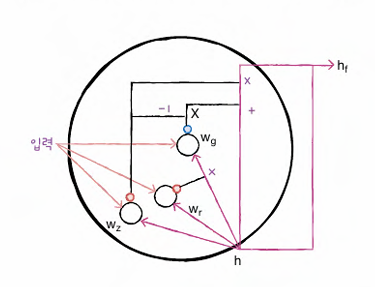

- GRU 셀에는 은닉 상태와 입력에 가중치를 곱하고 절편을 더하는 작은 셀이 3개 들어 있음
  - 2개는 시그모이드 활성화 함수를 사용함
  - 1개는 tanh 활성화 함수를 사용함

- 맨왼쪽에서 Wz를 사용하는 셀의 출력이 은닉 상태에 바로 곱해져 삭제 게이트 역할 수행
- 이와 똑같은 출력을 1에서 뺀다음 가장 오른쪽 Wg에 사용하는 셀의 출력에 곱함 => 이는 입력되는 정보를 제어하는 역할 수행
- 가운데 Wr을 사용하는 셀에서 출력된 값은 Wg 셀이 사용할 은닉 상태의 정보를 제어함

In [13]:
model4 = keras.Sequential()

model4.add(keras.layers.Embedding(500, 16, input_shape=(100,)))
model4.add(keras.layers.GRU(8)) # 클래스를 lstm에서 gru로 바꿈
model4.add(keras.layers.Dense(1, activation='sigmoid'))

model4.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 100, 16)        │         8,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 8)              │           624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,633 (33.72 KB)

 Trainable params: 8,633 (33.72 KB)

 Non-trainable params: 0 (0.00 B)

- GRU셀에서 가진 3개의 작은 셀: 입력과 은닉 상태에 곱하는 가중치와 절편 보유
  - 입력에 곱하는 가중치 16*8=128개
  - 은닉 상태에 곱하는 가중치는 8*8=64개
  - 절편은 뉴런마다 하나씩이므로 8개
  - 모두 더하면 128+64+8=200개
  - 이러한 셀이 3개이므로 200*3=600개

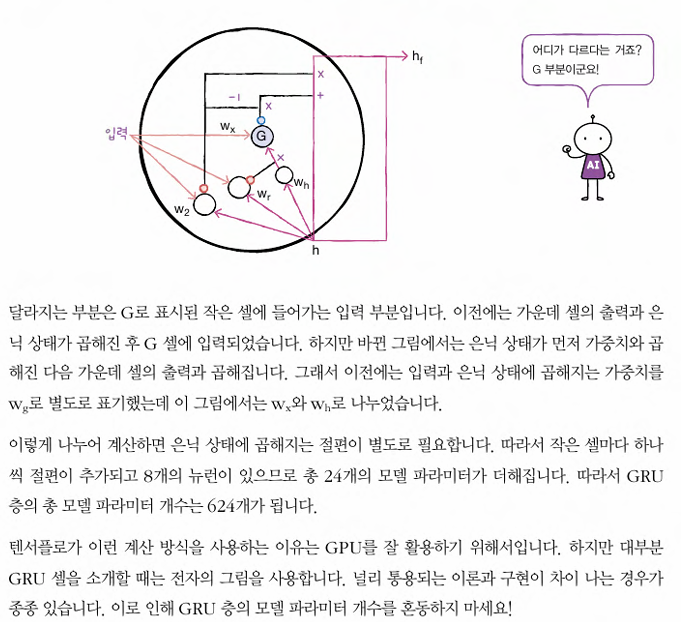

In [14]:
# 모델 훈련
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy',
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.keras',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model4.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5052 - loss: 0.6931 - val_accuracy: 0.5206 - val_loss: 0.6928
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5532 - loss: 0.6925 - val_accuracy: 0.5616 - val_loss: 0.6921
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5831 - loss: 0.6917 - val_accuracy: 0.5714 - val_loss: 0.6911
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5901 - loss: 0.6903 - val_accuracy: 0.5844 - val_loss: 0.6893
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6033 - loss: 0.6882 - val_accuracy: 0.5938 - val_loss: 0.6866
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6136 - loss: 0.6849 - val_accuracy: 0.6036 - val_loss: 0.6822
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6197 - loss: 0.6796 - val_accuracy: 0.6120 - val_loss: 0.6752
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6300 - loss: 0.6713 - val_ac

LSTM과 성능 거의 비슷

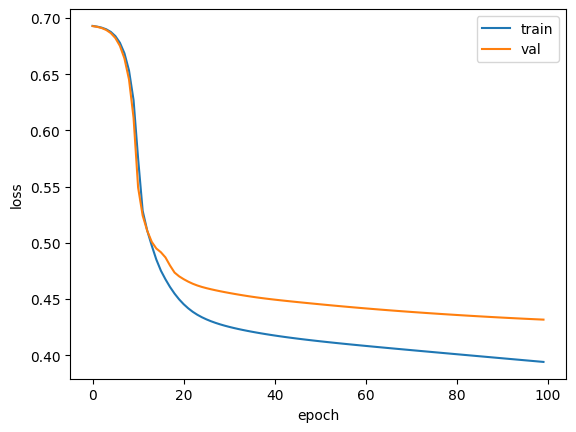

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

드롭아웃을 사용하지 않았기 때문에 TRAIN과 VAL 손실에 차이가 있지만 훈련과정이 잘 수렴하고 있음

## 마무리

- 가장 좋았던 2개의 순환층을 쌓은 모델을 다시 로드하여 TEST 세트에 대한 성능 확인
- 먼저 테스트 세트를 훈련세트와 동일한 방식으로 변환하고
- load_model() 함수를 사용해 파일을 읽고 evaluate() 메서드로 테스트 세트에서 성능 계산

In [16]:
test_seq = pad_sequences(test_input, maxlen=100)

rnn_model = keras.models.load_model('best-2rnn-model.keras')

rnn_model.evaluate(test_seq, test_target)

782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7866 - loss: 0.4654


[0.4673372209072113, 0.7847599983215332]